In [1]:
import numpy as np

import pandas as pd

from gtda.time_series import SingleTakensEmbedding

from gtda.plotting import plot_point_cloud 

from persim import plot_diagrams 

from ripser import ripser

import matplotlib.pyplot as plt

import itertools


In [2]:
def takens_embedding(signal, embedding_dimension):
    
    embedder = SingleTakensEmbedding(parameters_type="fixed", dimension=embedding_dimension)
    
    point_cloud = embedder.fit_transform(signal)

    return point_cloud

def persistent_homology(point_cloud):
    
    persistent_diagram = ripser(point_cloud)['dgms']

    return persistent_diagram 

## sin cos

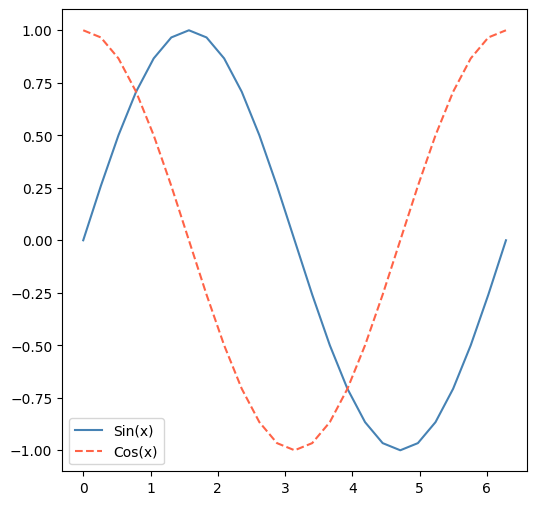

[0.         0.26179939 0.52359878 0.78539816 1.04719755 1.30899694
 1.57079633 1.83259571 2.0943951  2.35619449 2.61799388 2.87979327
 3.14159265 3.40339204 3.66519143 3.92699082 4.1887902  4.45058959
 4.71238898 4.97418837 5.23598776 5.49778714 5.75958653 6.02138592
 6.28318531]
[ 0.00000000e+00  2.58819045e-01  5.00000000e-01  7.07106781e-01
  8.66025404e-01  9.65925826e-01  1.00000000e+00  9.65925826e-01
  8.66025404e-01  7.07106781e-01  5.00000000e-01  2.58819045e-01
  1.22464680e-16 -2.58819045e-01 -5.00000000e-01 -7.07106781e-01
 -8.66025404e-01 -9.65925826e-01 -1.00000000e+00 -9.65925826e-01
 -8.66025404e-01 -7.07106781e-01 -5.00000000e-01 -2.58819045e-01
 -2.44929360e-16]

[ 1.00000000e+00  9.65925826e-01  8.66025404e-01  7.07106781e-01
  5.00000000e-01  2.58819045e-01  6.12323400e-17 -2.58819045e-01
 -5.00000000e-01 -7.07106781e-01 -8.66025404e-01 -9.65925826e-01
 -1.00000000e+00 -9.65925826e-01 -8.66025404e-01 -7.07106781e-01
 -5.00000000e-01 -2.58819045e-01 -1.83697020e-16  

In [4]:
import numpy as np

import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 25)  

sin_y = np.sin(x)  

cos_y = np.cos(x) 

plt.figure(figsize = (6, 6))

plt.plot(x, sin_y, label = 'Sin(x)', color = 'steelblue')

plt.plot(x, cos_y, label = 'Cos(x)', color = 'tomato', linestyle = '--')

plt.legend()

# plt.grid(True)

plt.savefig('../../images/sin_cos_signal.png')

plt.show()

print(x)

print(sin_y)

print()

print(cos_y)

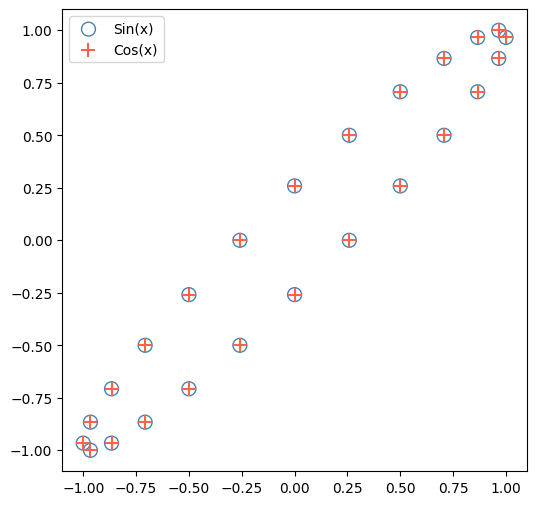

In [5]:
sin_point_cloud = takens_embedding(sin_y, 2)

cos_point_cloud = takens_embedding(cos_y, 2)

plt.figure(figsize = (6, 6))

plt.scatter(sin_point_cloud[:, 0], sin_point_cloud[:, 1], color = 'steelblue', marker = 'o', facecolors = 'none', label = 'Sin(x)', s = 100)

plt.scatter(cos_point_cloud[:, 0], cos_point_cloud[:, 1], color = 'tomato', marker = '+', label = 'Cos(x)', s = 100)

plt.legend()

plt.savefig('../../images/sin_cos_point_cloud.png')

plt.show()

sin_pd = persistent_homology(sin_point_cloud)

cos_pd = persistent_homology(cos_point_cloud)


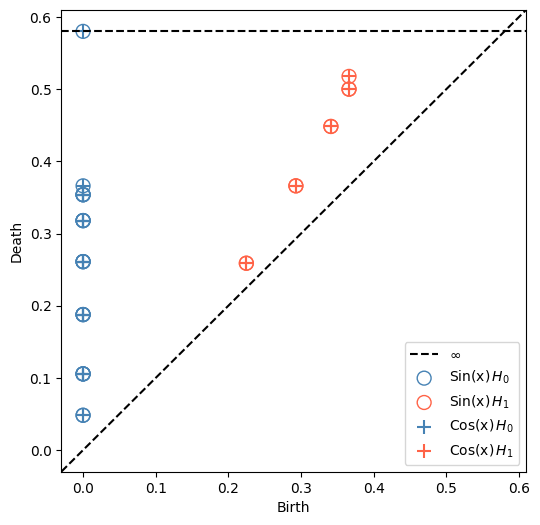

In [6]:
plt.figure(figsize = (6, 6))

x = np.linspace(-1, 0.7, 100)

plt.plot(x, x, 'k--', label = r'$\infty$') 

data1_h0 = r'$\mathrm{Sin(x) } \, H_{0}$'

data1_h1 = r'$\mathrm{Sin(x) } \, H_{1}$'

marker1 = 'o'

size1 = 100

plt.scatter(sin_pd[0][:, 0], sin_pd[0][:, 1], color = 'steelblue', marker = marker1, facecolors = 'none', label = data1_h0, s = size1)

plt.scatter(0, 0.58, color = 'steelblue', marker = marker1, facecolors = 'none', s = size1)

plt.scatter(sin_pd[1][:, 0], sin_pd[1][:, 1], color = 'tomato', marker = marker1, facecolors = 'none', label = data1_h1, s = size1)

data2_h0 = r'$\mathrm{Cos(x) } \, H_{0}$'

data2_h1 = r'$\mathrm{Cos(x) } \, H_{1}$'

marker2 = '+'

size2 = 100

plt.scatter(cos_pd[0][:, 0], cos_pd[0][:, 1], color = 'steelblue', marker = marker2, label = data2_h0, s = size2)

plt.scatter(0, 0.58, color = 'steelblue', marker=marker2, s=size2)

plt.scatter(cos_pd[1][:, 0], cos_pd[1][:, 1], color = 'tomato', marker = marker2, label = data2_h1, s = size2)

plt.axhline(y = 0.58, color = 'k', linestyle = '--')  # 水平虛線

plt.legend(loc = 'lower right')

plt.xlabel('Birth')

plt.ylabel('Death')

plt.xlim(-0.03, 0.61)

plt.ylim(-0.03, 0.61)

plt.savefig('../../images/sin_cos_persistence_diagram.png')

plt.show()

## sin cos 3 sliding window research

In [8]:
def sliding_windows(signal, window_size):
    
    window = SingleTakensEmbedding(parameters_type="fixed", dimension=window_size)
    
    sliding_windows = window.fit_transform(signal)
    
    return sliding_windows

In [9]:
window_size = 5 

signal = sin_y 

sin_allwindow = sliding_windows(signal, window_size)

signal = cos_y

cos_allwindow = sliding_windows(signal, window_size)


In [10]:
sin_cloud = [] 

cos_cloud = [] 

for i in range(0, 3):
    
    sin_cloud.append(takens_embedding(sin_allwindow[i], embedding_dimension = 2))

for i in range(0, 3):
    
    cos_cloud.append(takens_embedding(cos_allwindow[i], embedding_dimension = 2))


In [11]:
sin_pd = [] 

cos_pd = [] 

for i in range(0, 3):
    
    sin_pd.append(persistent_homology(sin_cloud[i]))

for i in range(0, 3):
    
    cos_pd.append(persistent_homology(cos_cloud[i]))


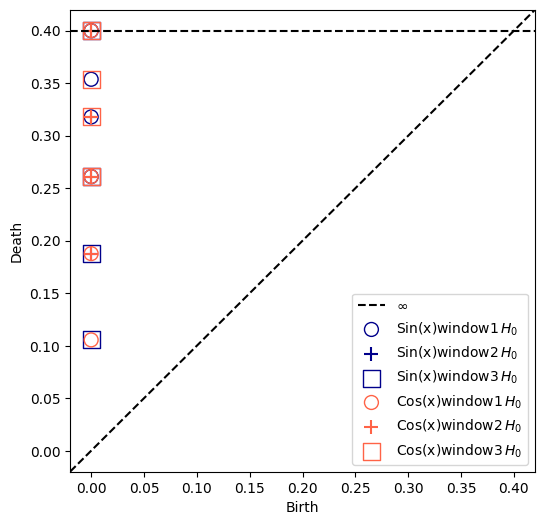

In [12]:
plt.figure(figsize=(6, 6))

x = np.linspace(-1, 0.48, 100)

plt.plot(x, x, 'k--', label = r'$\infty$') 

data1_h0 = r'$\mathrm{Sin(x) window 1 } \, H_{0}$'

data2_h0 = r'$\mathrm{Sin(x) window 2 } \, H_{0}$'

data3_h0 = r'$\mathrm{Sin(x) window 3 } \, H_{0}$'

marker1 = 'o'

marker2 = '+'

marker3 = 's'

size1 = 100

size2 = 150

plt.scatter(sin_pd[0][0][:, 0], sin_pd[0][0][:, 1], color = 'darkblue', marker = marker1, facecolors = 'none', label = data1_h0, s = size1)

plt.scatter(sin_pd[1][0][:, 0], sin_pd[1][0][:, 1], color = 'darkblue', marker = marker2, label = data2_h0, s = size1)

plt.scatter(sin_pd[2][0][:, 0], sin_pd[2][0][:, 1], color = 'darkblue', marker = marker3, facecolors = 'none', label = data3_h0, s = size2)

plt.scatter(0, 0.4, color = 'darkblue', marker = marker1, facecolors = 'none', s = size1)

plt.scatter(0, 0.4, color = 'darkblue', marker = marker2, s = size1)

plt.scatter(0, 0.4, color = 'darkblue', marker = marker3, facecolors = 'none', s = size2)

data4_h0 = r'$\mathrm{Cos(x) window 1 } \, H_{0}$'

data5_h0 = r'$\mathrm{Cos(x) window 2 } \, H_{0}$'

data6_h0 = r'$\mathrm{Cos(x) window 3 } \, H_{0}$'

plt.scatter(cos_pd[0][0][:, 0], cos_pd[0][0][:, 1], color = 'tomato', marker = marker1, facecolors = 'none', label = data4_h0, s = size1)

plt.scatter(cos_pd[1][0][:, 0], cos_pd[1][0][:, 1], color = 'tomato', marker = marker2, label = data5_h0, s = size1)

plt.scatter(cos_pd[2][0][:, 0], cos_pd[2][0][:, 1], color = 'tomato', marker = marker3, facecolors = 'none', label = data6_h0, s = size2)

plt.scatter(0, 0.4, color = 'tomato', marker = marker1, facecolors = 'none', s = size1)

plt.scatter(0, 0.4, color = 'tomato', marker = marker2, s = size1)

plt.scatter(0, 0.4, color = 'tomato', marker = marker3, facecolors = 'none', s = size2)

plt.axhline(y = 0.4, color = 'k', linestyle = '--')  # 水平虛線

plt.legend(loc = 'lower right')

plt.xlabel('Birth')

plt.ylabel('Death')

plt.xlim(-0.02, 0.42)

plt.ylim(-0.02, 0.42)

plt.savefig('../../images/sin_cos_3_sliding_windows_persistence_diagram.png')

plt.show()